## Are women Nobel Prize winners younger than men on average?
### The motivation: 
The motivation of this analysis comes from a random comment I heard after the Nobel Prize announcements 2020. The comment was that women seemed  to win Nobel Prizes at relatively younger ages than men. Then they listed a few female winners of recent years as supporting evidence, including 'Malala Yousafzai', who won the 2014 Nobel Peace Prize at the age of 17, and this year's winners for Physics and Chemistry. My first reaction was that this was a hand-wavy statement based on cherry-picking evidence, hence unlikely to be true. 

This analysis aims to find an answer in the latest dataset of the prize recipients over the past 120 years.

### Load the data:

In [20]:
import glob
import pandas as pd

csvfile = glob.glob('./**/nobel_1901_2020.csv', recursive = False)
filename = csvfile[0]

df = pd.read_csv(filename)
print(type(df))  # making sure the DataFrame is properly loaded.
print('rows and columns ', df.shape)  # checking the dimension.
df.head() # checking the first few rows.

<class 'pandas.core.frame.DataFrame'>
rows and columns  (961, 10)


,year,category,laureate_type,full_name,birth_year,birth_city,birth_country,gender,prize,motivation
0,1901,Chemistry,Individual,Jacobus Henricus van 't Hoff,1852.0,Rotterdam,Netherlands,Male,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ..."
1,1901,Literature,Individual,Sully Prudhomme,1839.0,Paris,France,Male,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit..."
2,1901,Medicine,Individual,Emil Adolf von Behring,1854.0,Hansdorf (Lawice),Prussia (Poland),Male,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its..."
3,1901,Peace,Individual,Jean Henry Dunant,1828.0,Geneva,Switzerland,Male,The Nobel Peace Prize 1901,NaN
4,1901,Peace,Individual,FrÃ©dÃ©ric Passy,1822.0,Paris,France,Male,The Nobel Peace Prize 1901,NaN


### Data visualisation:
An overview plot will help us see what kind of analyses are needed to get the answer. Let's plot the recipients' age as a function of the award year coloured by gender on the same plot. 

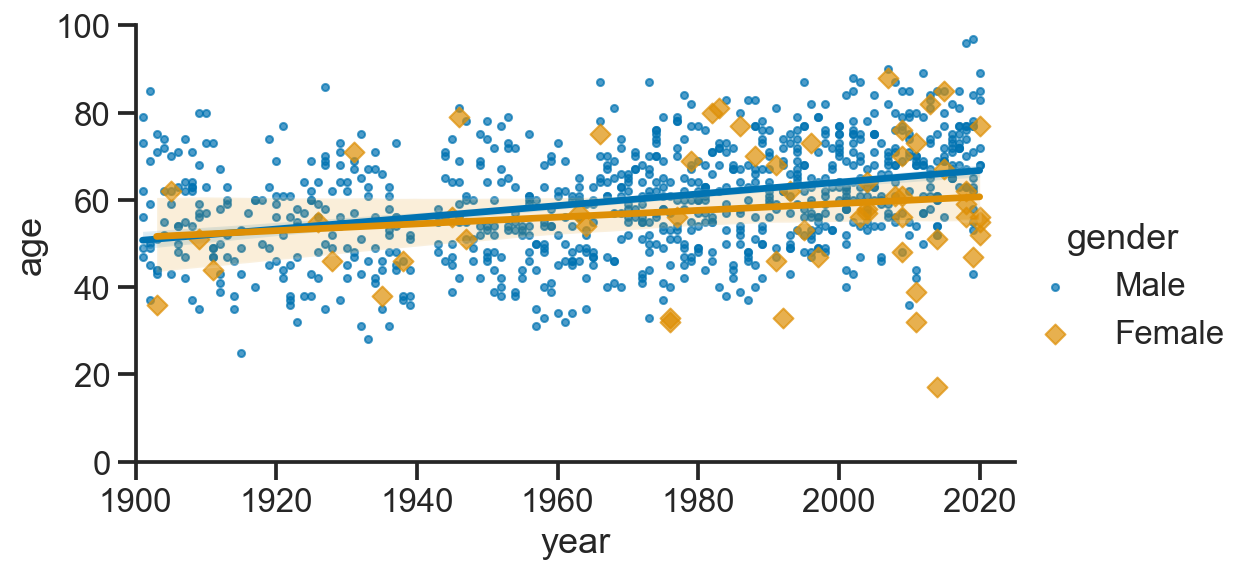

In [21]:
# Uncomment the line below to make plots interative.
# %matplotlib widget   

# Make images less blurry on Jupyter.
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add a new column to store the 'age' of winners in the dataframe. 
df['age'] = df['year'] - df['birth_year']

# Customise seaborn setting for good visual.
sns.set()
sns.set_palette('colorblind')
sns.set_style('ticks')
sns.set_context('talk')

g = sns.lmplot(x = 'year', y='age', data = df, 
               hue = 'gender',
               lowess = False,
               height = 4,
               aspect = 1.8, 
               markers = ['.', 'D'],
               scatter_kws = {'alpha':0.7,'s':50}, 
               line_kws = {'alpha':1}, 
               ci = 95,
               legend_out = True, 
               )
g.set(ylim = (0, 100), xlim = (1900, 2025))
plt.show()
g.savefig('Figure1a.jpg', dpi = 300)

The age vs. year relation is interesting. We know that the life expectancy of people increased over the past few centuries, and different countries have different life expectancies (https://ourworldindata.org/life-expectancy). So let us plot the average life expectancy of the recipients' birth countries on Figure 1.  

<class 'pandas.core.frame.DataFrame'>
check rows and columns  (19028, 4)
(961, 15) (961, 11)


,year,category,laureate_type,full_name,birth_year,birth_city,birth_country,gender,prize,motivation,age,Entity,Code,Year,Life expectancy
0,1901,Chemistry,Individual,Jacobus Henricus van 't Hoff,1852.0,Rotterdam,Netherlands,Male,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",49.0,Netherlands,NLD,1901.0,48.709999
1,1901,Literature,Individual,Sully Prudhomme,1839.0,Paris,France,Male,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",62.0,France,FRA,1901.0,46.930000
2,1901,Medicine,Individual,Emil Adolf von Behring,1854.0,Hansdorf (Lawice),Prussia (Poland),Male,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",47.0,NaN,NaN,NaN,NaN
3,1901,Peace,Individual,Jean Henry Dunant,1828.0,Geneva,Switzerland,Male,The Nobel Peace Prize 1901,NaN,73.0,Switzerland,CHE,1901.0,48.939999
4,1901,Peace,Individual,FrÃ©dÃ©ric Passy,1822.0,Paris,France,Male,The Nobel Peace Prize 1901,NaN,79.0,France,FRA,1901.0,46.930000


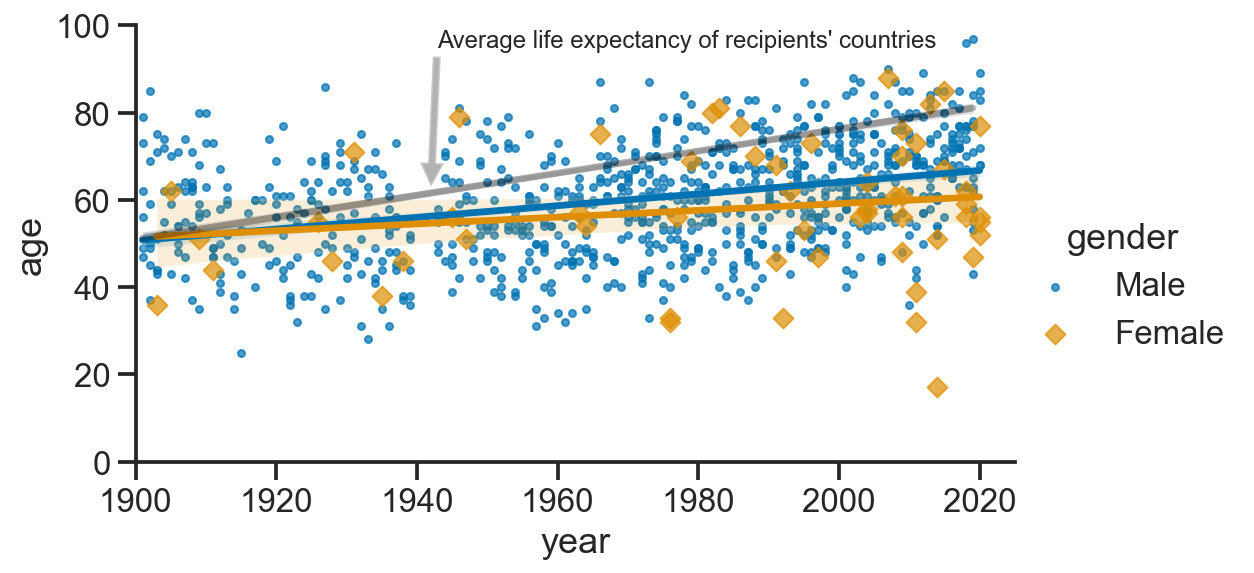

In [22]:
csvfile2 = glob.glob('./**/life-expectancy.csv', recursive = False)
filename2 = csvfile2[0]

life_exp = pd.read_csv(filename2)
print(type(life_exp))  
print('check rows and columns ', life_exp.shape)  
life_exp.head()

# Merge the two dataframe left = df, right = life_exp. 
# We get the life expectancy for that country at that year.
# There are going to be some NAN for non-matches but ok for getting the average
pd_new = df.merge(life_exp, left_on=['birth_country', 'year'], 
                  right_on = ['Entity', 'Year'], suffixes = ('_nb','_exp'),
                  how = 'left')
print(pd_new.shape, df.shape)
display(pd_new.head())
pd_new_age = pd_new.groupby(by=['Year'], as_index=False)['Life expectancy'].mean()

g = sns.lmplot(x = 'year', y='age', data = df, 
               hue = 'gender',
               lowess = False,
               height = 4,
               aspect = 1.8, 
               markers = ['.', 'D'],
               scatter_kws = {'alpha':0.7,'s':50}, 
               line_kws = {'alpha':1}, 
               ci = 95,
               legend_out = True, 
               )
g.set(ylim = (0, 100), xlim = (1900, 2025))

ax2 = g.axes
color = 'tab:red'
ax2 = sns.regplot(x = 'Year', 
                  y = 'Life expectancy', 
                  data = pd_new_age, 
                  scatter = False,
                  line_kws = {'color':'black', 'alpha': 0.3})

ax2.annotate(text = "Average life expectancy of recipients' countries", 
             xy = (1942, 63), 
             xycoords = 'data',
             xytext = (3, 70),
             textcoords = 'offset points',
             arrowprops = dict(facecolor = 'black', alpha = 0.3),
             fontsize = 12)

ax2.set_xlabel('year')
ax2.set_ylabel('age')
plt.show()
g.savefig('Figure1b.jpg', dpi = 300)

Visualise the gender imbalance and explore the data a bit more by plotting each award category:

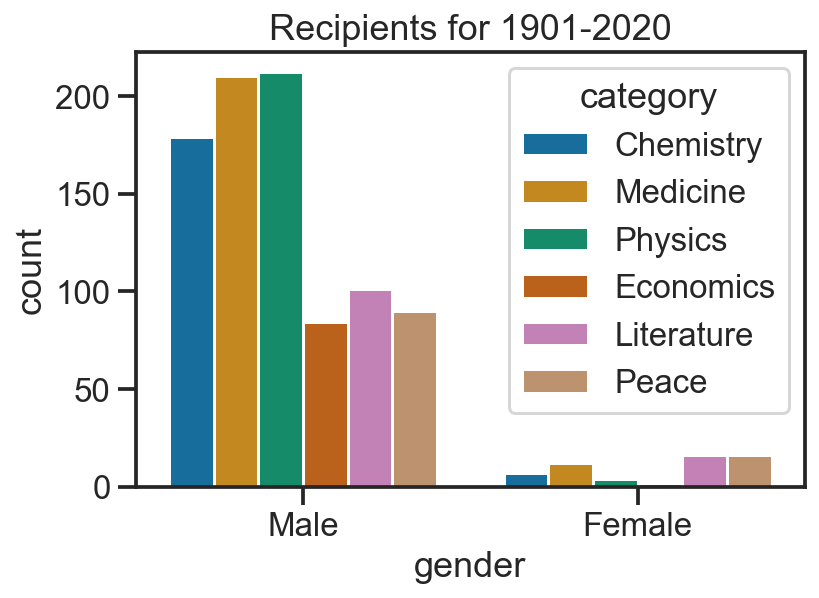

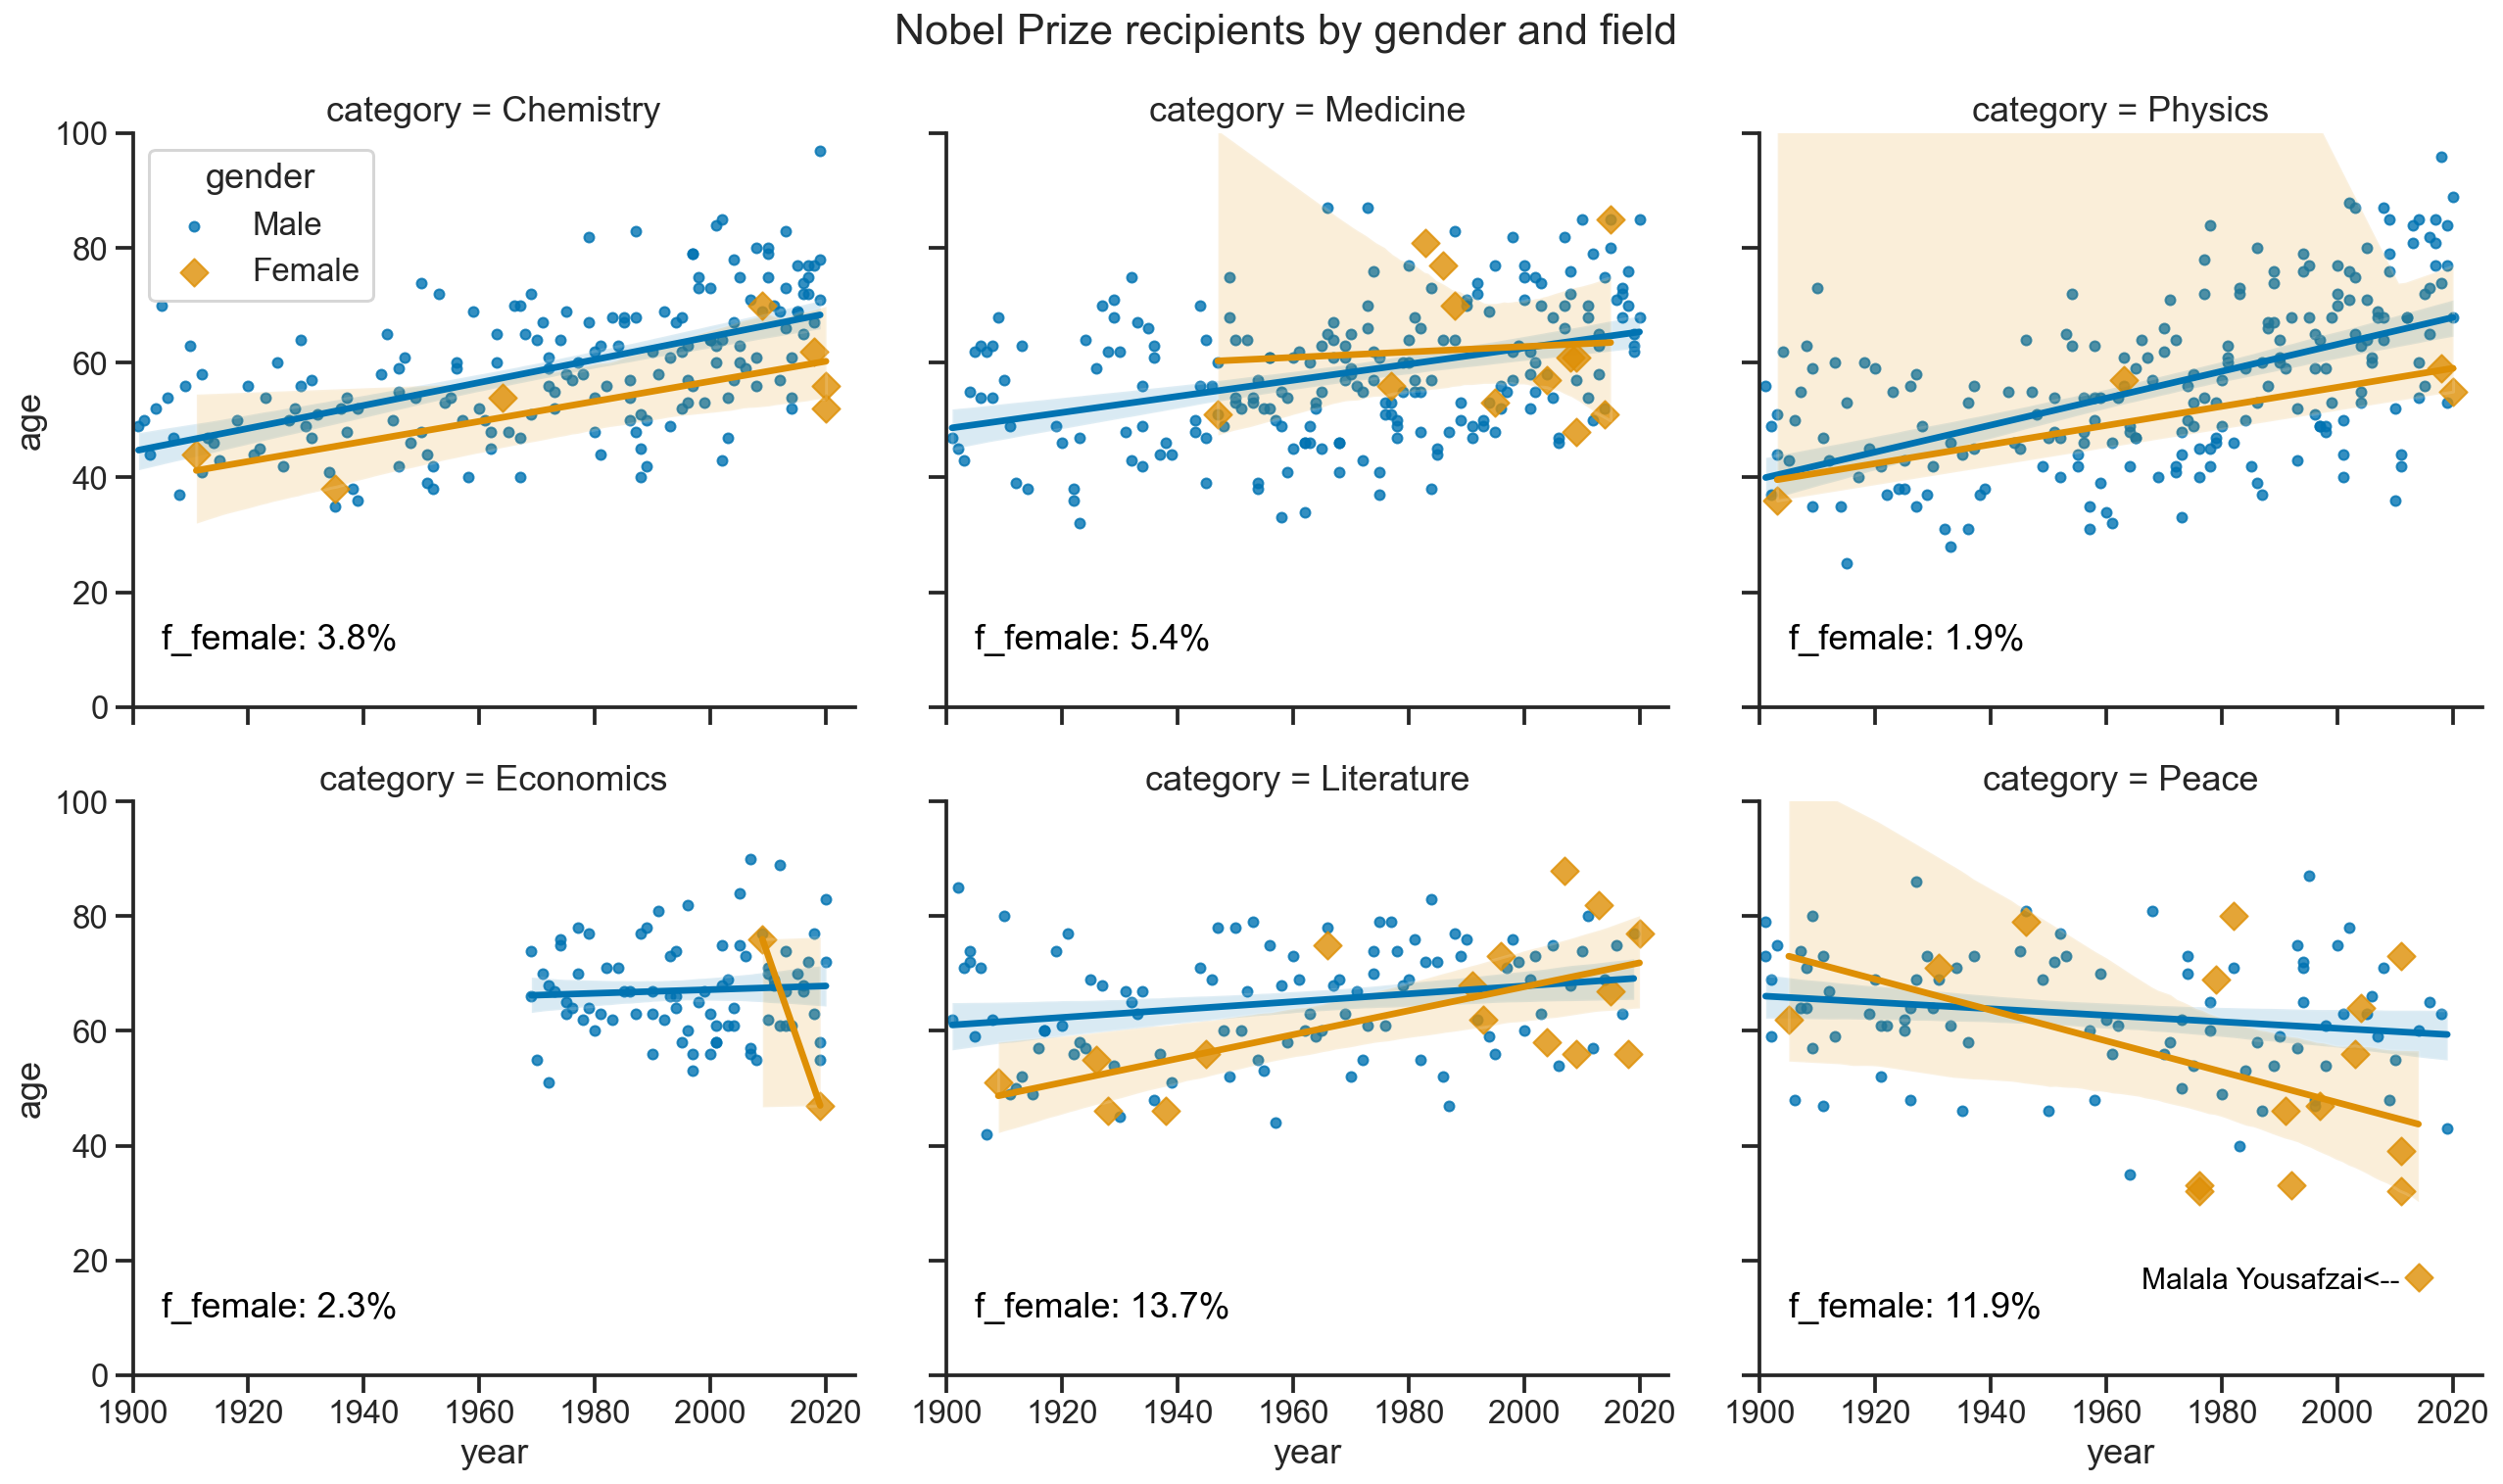

Total fraction of female winners 0.061



In [24]:
# visualise the number counts for each gender in six award categories.
plt.rcParams['figure.figsize'] = [6, 4]
cat_order = ['Chemistry', 'Medicine', 'Physics', 'Economics', 'Literature', 'Peace']
g = sns.countplot(x = 'gender', 
                  data = df, 
                  hue = 'category', 
                  hue_order = cat_order)

# Seaborn creates 2 types of objects: FacetGrid and AxesSubplot.
# They have different method names for adding titles.
# If not sure, check (type(g)) first.    
g.set_title('Recipients for 1901-2020')
# g.fig.suptitle() # For FacetGrid object.
plt.show()
g.figure.savefig('Figure2.jpg', dpi = 300, bbox_inches='tight')

# make a new dataframe with two columns: category and fraction of female winners in that category
df['female_winner'] = df['gender'] == 'Female'
female_winners = df.groupby(by=['category'], as_index=False)['female_winner'].mean()
female_winners.head()

# Separate plots by award categories.
g = sns.lmplot(x = 'year', y='age', data = df, 
               hue = 'gender',
               col = 'category', 
               col_wrap = 3, 
               col_order = cat_order,
               ci = 95, 
               lowess = False,
               aspect = 1.2, 
               markers = ['.', 'D'],
               scatter_kws = {'alpha':0.8,'s':100}, 
               legend_out= False, 
               sharex = True, sharey = True)
g.set(ylim = (0, 100), xlim = (1900, 2025))
g.fig.suptitle('Nobel Prize recipients by gender and field', y = 1.03)

for panel, cat_name in enumerate(cat_order):
    frac_cat = female_winners[female_winners['category'] == cat_name]['female_winner'].values
    frac_cat = np.round(frac_cat * 100, 1)
    sfrac_cat = 'f_female: ' + str(frac_cat[0]) + '%'
    ax = g.axes[panel]
    ax.text(1905, 10, sfrac_cat, fontsize = 18, color = 'black')

# highlight the name of the youngest winner.    
ax = g.axes[5]
name_young = df.nsmallest(1,'age').iloc[0,3]
text = name_young + "<--"
ax.text(1966, 15, text, fontsize = 15, color = 'black')
plt.show()
g.savefig('Figure3.jpg', dpi = 300)

# Calculate the fraction of female winners in each category.
num_male = df[df['gender'] == 'Male']['gender'].value_counts()
num_female = df[df['gender'] == 'Female']['gender'].value_counts()
frac = np.round(num_female.iloc[0]/(num_male.iloc[0] + num_female.iloc[0]), 3)
print(f'Total fraction of female winners {frac}\n')

The 'Peace' category seems to show negative correlation between age and year. Let's separate it and see how Figure 1. changes.

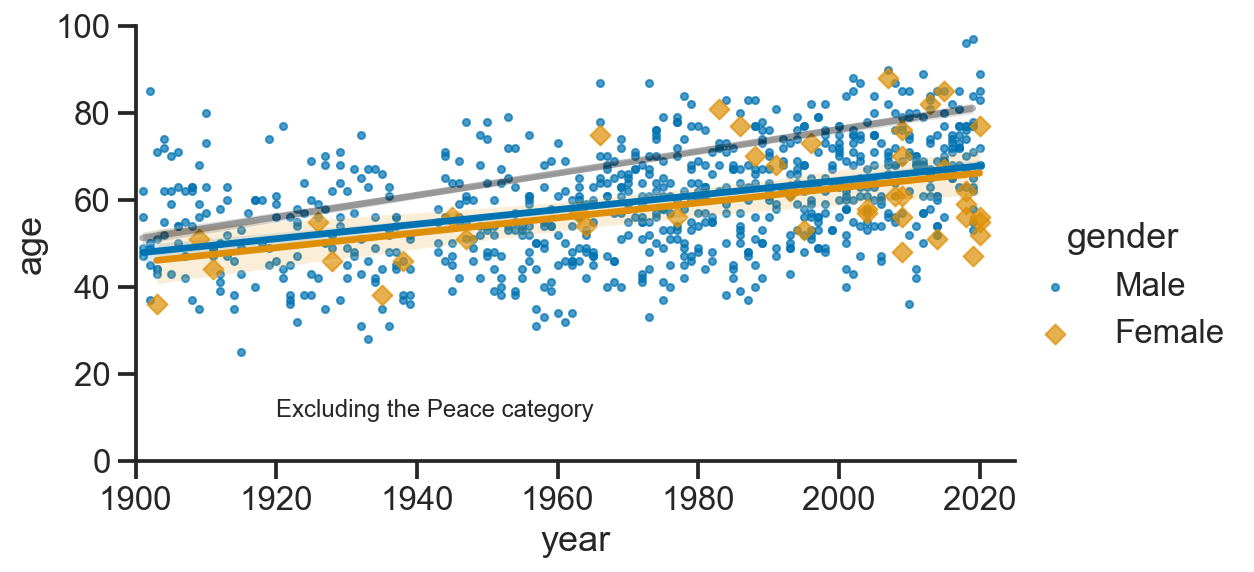

In [5]:
# Visualise how the trend change without the Peace category.
df_cut = df[df['category'] != 'Peace']
df_peace = df[df['category'] == 'Peace']

g = sns.lmplot(x = 'year', y='age', data = df_cut, 
               hue = 'gender',
               lowess = False,
               height = 4,
               aspect = 1.8, 
               markers = ['.', 'D'],
               scatter_kws = {'alpha':0.7,'s':50}, 
               line_kws = {'alpha':1}, 
               ci = 95,
               )
g.set(ylim = (0, 100), xlim = (1900, 2025))

ax2 = g.axes
color = 'tab:red'
ax2 = sns.regplot(x = 'Year', 
                  y = 'Life expectancy', 
                  data = pd_new_age, 
                  scatter = False,
                  line_kws = {'color':'black', 'alpha': 0.3})

ax2.annotate(text = "Excluding the Peace category", 
             xy = (1920, 10), 
             xycoords = 'data',
             fontsize = 12)

ax2.set_xlabel('year')
ax2.set_ylabel('age')

plt.show()
g.savefig('Figure1c.jpg', dpi = 300)

We can quantify the statistical significance of the age vs. award year relation for each category using Pearson tests. The Pearson coefficient 'r' ranges from -1 to 1 and is sensitive to outliers. r = -1/0/+1 means a perfect negative/none/positive correlation.  The p value indicates the statistical significance of the null hypothesis that there is no linear correlation  between 'x' and 'y'. The smaller the p, the more significant the correlation. 

In [6]:
# Pearson test on the significance of the correlation between age and year.
# Do it for 1) all groups, 2) Excluding Peace, 3) Only for Peace...
# ... 4) Peace-Females, 5) Peace-Males.  
# We carry out category-based test only for the Peace group as ..
# ..it shows the largest difference bewteeen F/M and suffers the least from..
# .. small number statistics for the female group.

# The following code can be made more compact by a loop.
# This format has the advantage of good clarity.
from scipy.stats import pearsonr

# correlation for all datapoints.
x = df['year']
y = df['age']
# Ignore NAN, e.g. a winning organisation has no age/gender.
nas = np.logical_or(x.isnull(), y.isnull()) 
corr = pearsonr(x[~nas].values, y[~nas].values)
corr = [np.round(c, 3) for c in corr]
print('For all data,  the Pearson coeffients r and p are: ', corr)

# correlation for all datapoints except the Peace category.
x = df[df['category'] != 'Peace']['year']
y = df[df['category'] != 'Peace']['age']
nas = np.logical_or(x.isnull(), y.isnull())
corr = pearsonr(x[~nas].values, y[~nas].values)
corr = [np.round(c, 3) for c in corr]
print('After excluding the Peace category, the Pearson coeffients r and p are: ', corr)

# correlation for only the Peace category.
x = df[df['category'] == 'Peace']['year']
y = df[df['category'] == 'Peace']['age']
nas = np.logical_or(x.isnull(), y.isnull()) # Ignore NAN, e.g. a winning organisation has no age/gender.
corr = pearsonr(x[~nas].values, y[~nas].values)
corr = [np.round(c, 3) for c in corr]
print('For Peace, the Pearson coeffients r and p are: ', corr)

# correlation for only the Peace/Female category.
x = df[(df['gender'] == 'Female') & (df['category'] == 'Peace')]['year']
y = df[(df['gender'] == 'Female') & (df['category'] == 'Peace')]['age']
nas = np.logical_or(x.isnull(), y.isnull()) # Ignore NAN, e.g. a winning organisation has no age/gender.
corr = pearsonr(x[~nas].values, y[~nas].values)
corr = [np.round(c, 3) for c in corr]
print('For Peace and Female, the Pearson coeffients r and p are: ', corr)

# correlation for only the Peace/Male category.
x = df[(df['gender'] == 'Male') & (df['category'] == 'Peace')]['year']
y = df[(df['gender'] == 'Male') & (df['category'] == 'Peace')]['age']
nas = np.logical_or(x.isnull(), y.isnull()) # Ignore NAN, e.g. a winning organisation has no age/gender.
corr = pearsonr(x[~nas].values, y[~nas].values)
corr = [np.round(c, 3) for c in corr]
print('For Peace and Male, the Pearson coeffients r and p are: ', corr)

For all data,  the Pearson coeffients r and p are:  [0.343, 0.0]
After excluding the Peace category, the Pearson coeffients r and p are:  [0.442, 0.0]
For Peace, the Pearson coeffients r and p are:  [-0.287, 0.003]
For Peace and Female, the Pearson coeffients r and p are:  [-0.427, 0.099]
For Peace and Male, the Pearson coeffients r and p are:  [-0.191, 0.071]


The Pearson tests confirms what we see in a statistical way:  that the correlation between age and year is significant and the Peace category has a negative correlation. When dividing the Peace recipients into Male and Female groups, the statistical significace of the linear relation becomes too weak to draw confident conclusions. 

### About p value:
The last sentence above is based on the p value of the correlation test. The p value is widely used in the statistical world, and there are many controversy around it too.  A p value of 0.06-0.12 is similar to getting the same side of a coin 3-4 times in a row in a coin-tossing game, it is rare but still possible in the statistical fructuation of this Universe. A p value of 0.01-0.03 is like having the same side of a coin 6-7 times in a row, which intuitively, is becoming highly unlikely. That is why many people choose a p value of less than 0.02 or even 0.005 as a threshold to claim a signal or reject a null hypothesis. Of course, if you are looking for those extremely lucky events in the Universe, as rare as throwing a coin 8 times and get the same side 8 times, then, feel free to set a even lower p value to claim that you find it. This is where the biggest controversy around the p-value comes from. But I think the p value is super useful, as long as we do know what it is used for.     

**SO are we ready to answer the question of whether females recipients are younger than males?**
The effort above is to establish the correlation between age and year, so that we can answer this question in more depth. However, if we just want a simple answer, and ignore the dependence of age on the award year, then the answer is only one step away. 

We can use the p-value of the Kolmogorov–Smirnov (KS) test to evaluate the statistical significance of the null hypothesis that the two distributions are from the same parent sample. When p drops to a very low (<0.005) number, the null hypothesis can be rejected.

So to test if the age distribution of all the female repients is different from the male age distribution, we can simply do this:

p = 0.3655 >= 0.005
No difference between the age distribution of Females and Males


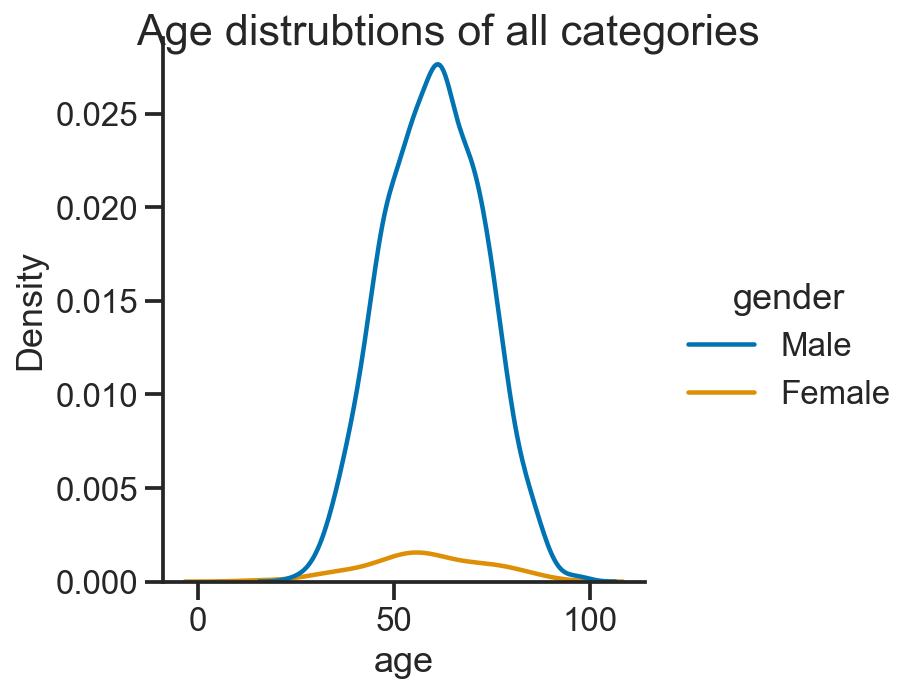

In [25]:
# KS test of the age distribution difference between F and M.
# Ks-Test for the F/M age distribution difference.
from scipy.stats import ks_2samp

# Threshold to reject the null hypothesis.
# Change this value and see if your conclusion depends on it.
p_thresh = 0.005

f_age = df[df['gender'] == 'Female']['age'].values
m_age = df[df['gender'] == 'Male']['age'].values
pval = np.around(ks_2samp(f_age, m_age)[1], 4)
if pval >= p_thresh:
    print(f'p = {pval} >= {p_thresh}')
    print('No difference between the age distribution of Females and Males')
else:
    print(f'p value {pval} < {p_thresh}')
    print('Significant difference between the age distribution of Females and Males')

g = sns.displot(df, 
                x = 'age', 
                hue = 'gender', 
                kind = 'kde')
g.fig.suptitle(f'Age distrubtions of all categories')
plt.savefig('Age_dist.png')
plt.show()

Again, using the coin tossing analogy, a p value of 0.36 is almost as random as throwing a coin 2 times and getting the same side 1 or 2 times. So, even though the absolute average age of women recipients seems to be slightly smaller than the men, it could be a result of a random draw. So if the question of this article is more precisely phrased as 'Are women recipients younger than men for the sample of all Nobel winners in the past 120 years?'. Then the answer is no. 

However, to give the person who raised the question some credit, they impliedthat women tend to win Nobel Prizes at relatively younger ages than men in recent years.  We do see that the difference between the male and female group seem to get larger.  What if we only consider 'recent years?'.  And which year shall we choose as the starting year of the 'recent year' ? 

We can figure this out using the same KS test. We will see how the difference between the F/M group change as we change the starting year of the sample.

Mean age of female: 58.0 and male: 66.0


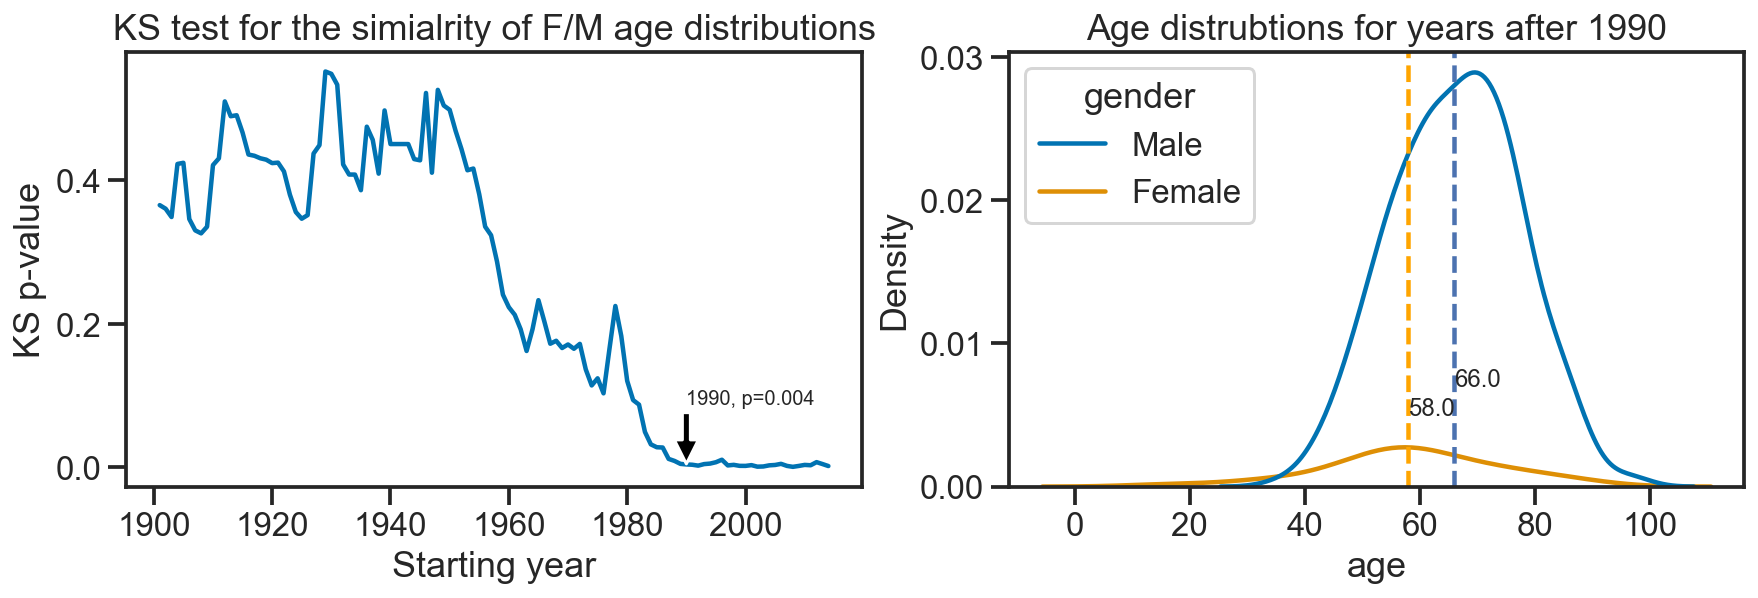

<Figure size 432x288 with 0 Axes>

In [26]:
# Ks-Test for the F/M age distribution difference.
from scipy.stats import ks_2samp

# Threshold to reject the null hypothesis.
# Change this value and see if your conclusion depends on it.
p_thresh = 0.005

# Find the earliest and latest yr in the sample.
yr_low = df.nsmallest(1,'year').iloc[0,0]
yr_hi = df.nlargest(1,'year').iloc[0,0]

# Adopt a minimal of 5 years for sample size.
year_series = np.array([yr for yr in range(yr_low, yr_hi-5)])
pears = np.zeros(len(year_series))

# Compare the F/M age distributions using different starting year.
for i, year_start in enumerate(year_series):                 
    female_by_yrs = df[(df['gender'] == 'Female') & (df['year'] >= year_start)]
    male_by_yrs = df[(df['gender'] == 'Male') & (df['year'] >= year_start)]
    by_yrs = df[df['year'] >= year_start]
    f = female_by_yrs['age'].iloc[:]
    m = male_by_yrs['age'].iloc[:]
    pears[i] = ks_2samp(f, m)[1]
    
# Visualise how the KS p-value change with the starting year.  
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey=False, figsize=(14.5, 4))

sns.lineplot(x = year_series, y = pears, ax = ax0)
ax0.set_title('KS test for the simialrity of F/M age distributions')
ax0.set_ylabel('KS p-value')
ax0.set_xlabel('Starting year')

# Annotate the year when p drops to p_thresh. 
change_year = year_series[pears < p_thresh]
p_val = pears[pears < p_thresh][0]
t_note = str(np.round(change_year[0], 1)) + ', p=' + str(np.round(p_val, 3))
ax0.annotate(text=t_note, 
            xy=(change_year[0], p_thresh), 
            xycoords='data',
            xytext=(0, 30),
            textcoords='offset points',
            arrowprops=dict(facecolor='black'),
            fontsize = 10)

female_by_yrs = df[(df['gender'] == 'Female') & (df['year'] > change_year.min())]
male_by_yrs = df[(df['gender'] == 'Male') & (df['year'] > change_year.min())]
by_yrs = df[df['year'] > change_year.min()]
mean_f = np.round(female_by_yrs['age'].mean(),0)
mean_m = np.round(male_by_yrs['age'].mean(),0)
print(f'Mean age of female: {mean_f} and male: {mean_m}')

sns.kdeplot(data = by_yrs, 
            x = 'age', 
            hue = 'gender', 
            ax = ax1)

ax1.set_title(f'Age distrubtions for years after {change_year.min()}')
ax1.axvline(x = mean_m, linestyle = '--', color = 'b')
ax1.axvline(x = mean_f, linestyle = '--', color = 'orange')
ax1.annotate(text= str(mean_f), 
            xy=(mean_f, 0.005), 
            xycoords='data',
            fontsize = 12)
ax1.annotate(text= str(mean_m), 
            xy=(mean_m, 0.007), 
            xycoords='data',
            fontsize = 12)
plt.show()
plt.savefig('Pvalue_vs_year_1990.png')

So yes, if we start composing a sample using 1990 year and on, the F/M will be statistically difference, as can be visually seen in the Figure above.

There is one last piece to figure out. The mean age of the female group (58) is smaller than that of the male group (66) (Figure above). How significant is this mean? The p-value evaluates the distribution function as a whole; it is does not yield a specific probability for the mean. This problem can be phrased as what are the odds of a randomly selected woman being younger than a randomly selected man from the 1996–2020 recipient pool. We can get this number by randomly selecting the recipients from the distributions tens of thousands of times (40k is good enough, as tested below), and count the number of times that a woman is younger.

The odds of a randomly select woman being younger than a randomly select man are 1.8 in 1


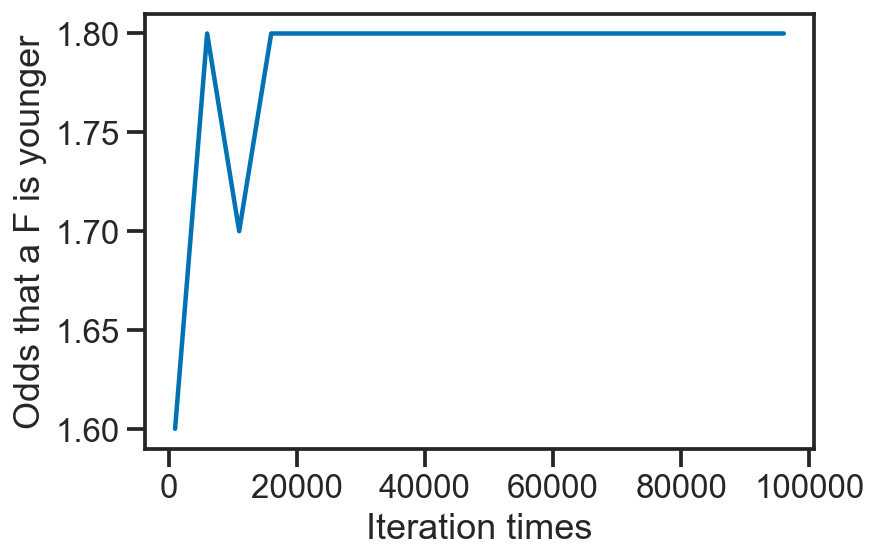

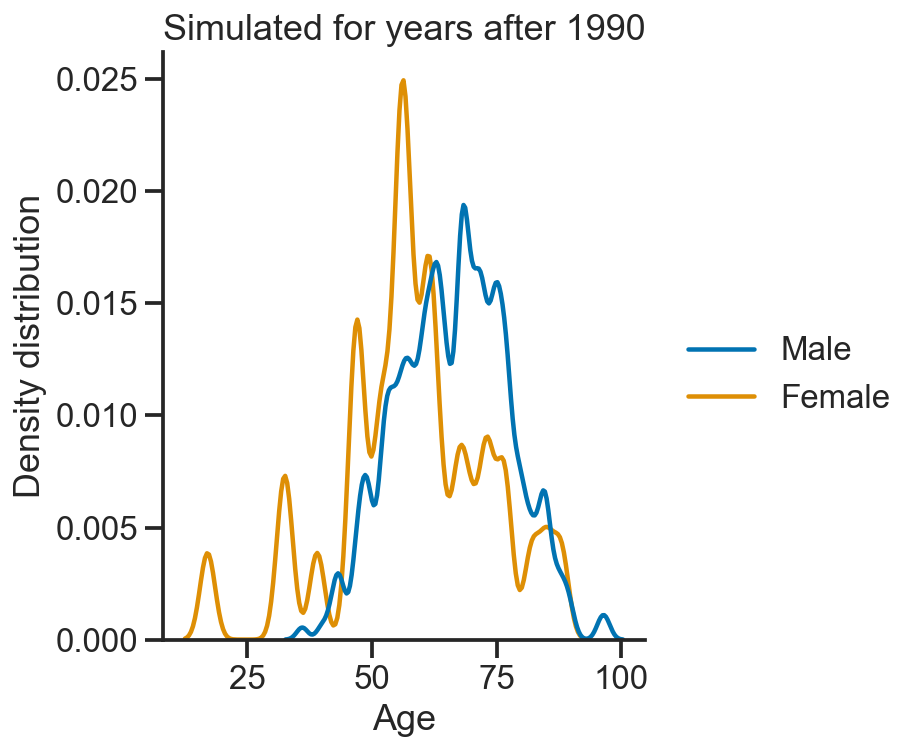

In [9]:
# Randomly draw 1 female and 1 male from their parent distributions, compute the odds of age_f < age_m
age_female_array = female_by_yrs['age'].iloc[:].values
age_male_array = male_by_yrs['age'].iloc[:].values
len_f = len(age_female_array)
len_m = len(age_male_array)

# Plot odds as a function of iteration time to find the min. number of runs. 
max_iter = 10**4
random_max = range(1000, max_iter, 5000)
odds_arr = []
for fu in random_max:
#     fu = max_iter  # max_iter = 10**4 is a large enough number, tested to converge.
    unis = range(100, 100+fu)      # random numbers to seed those universes
    count_f = 0
    count_t = 0
    f_age_arr = []
    m_age_arr = []

    for i in unis:
        np.random.seed(i) # a random universe
        rand1 = np.random.randint(0, len_f) # a random index for the f group
        f_age = age_female_array[rand1]
        rand2 = np.random.randint(0, len_m) # a random index for the f group
        m_age = age_male_array[rand2]
        f_age_arr.append(f_age)
        m_age_arr.append(m_age)
        if f_age < m_age:
            count_f = count_f + 1 
        count_t = count_t + 1   
    odds  = np.round((count_f/count_t)/(1 - (count_f/count_t)), 1)  
    odds_arr.append(odds)
    
# Visualise how the KS p-value change with the starting year.  
fig, ax = plt.subplots()
sns.lineplot(x = random_max, y = odds_arr, ax = None)
ax.set_ylabel('Odds that a F is younger')
ax.set_xlabel('Iteration times')    
print(f'The odds of a randomly select woman being younger than a randomly select man are {odds} in 1')   

newdf = pd.DataFrame(data=np.column_stack((m_age_arr, f_age_arr)),columns=['Male','Female'])
ax = sns.displot(newdf, kind = 'kde')
ax.set(xlabel = 'Age', ylabel = 'Density distribution', title = f'Simulated for years after {change_year.min()}')     
plt.savefig('Simulated.png')
plt.show()

The odds of a randomly select woman in ['Peace']
        being younger than a randomly select man are 4.2 in 1
The odds of a randomly select woman in ['Literature']
        being younger than a randomly select man are 0.9 in 1
The odds of a randomly select woman in ['Literature', 'Peace']
        being younger than a randomly select man are 1.6 in 1
The odds of a randomly select woman in ['Chemistry', 'Medicine', 'Physics', 'Economics']
        being younger than a randomly select man are 2.1 in 1


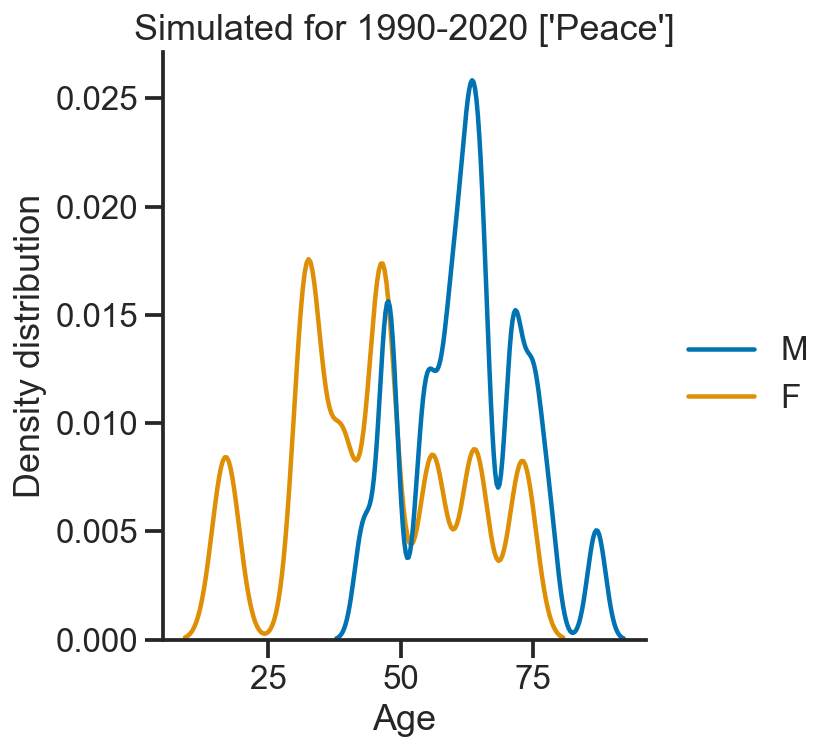

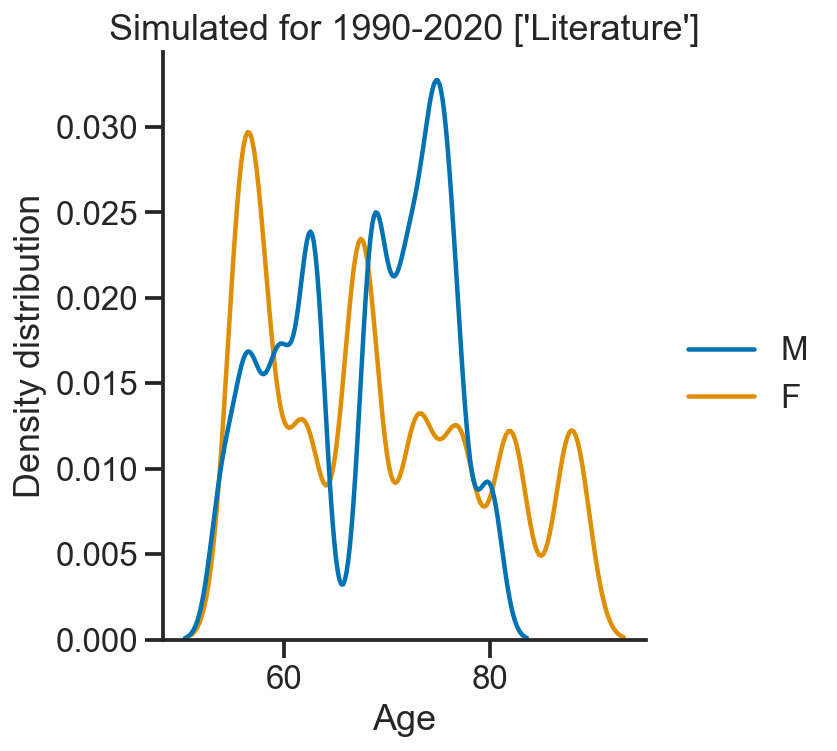

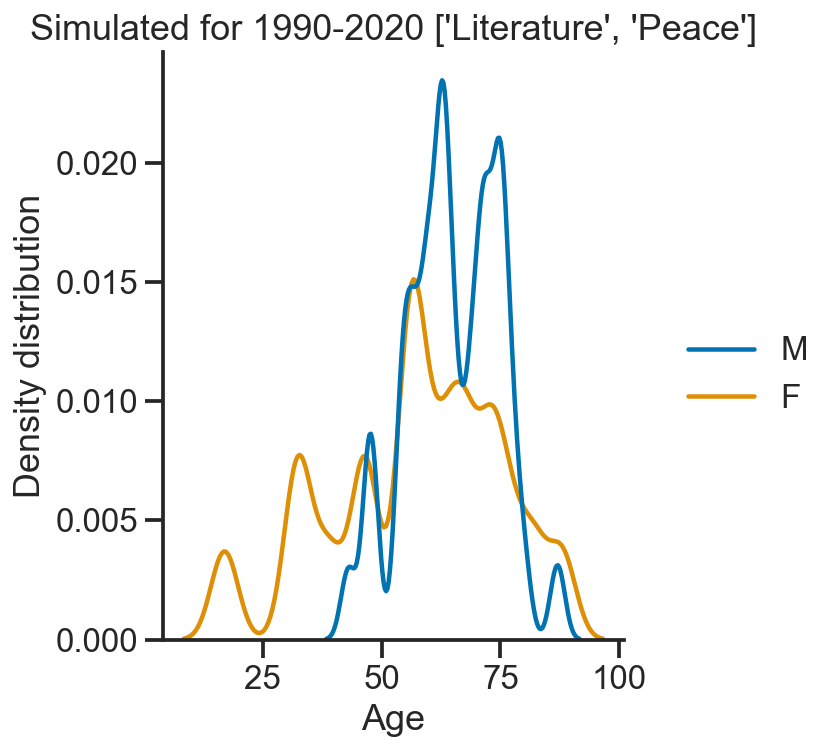

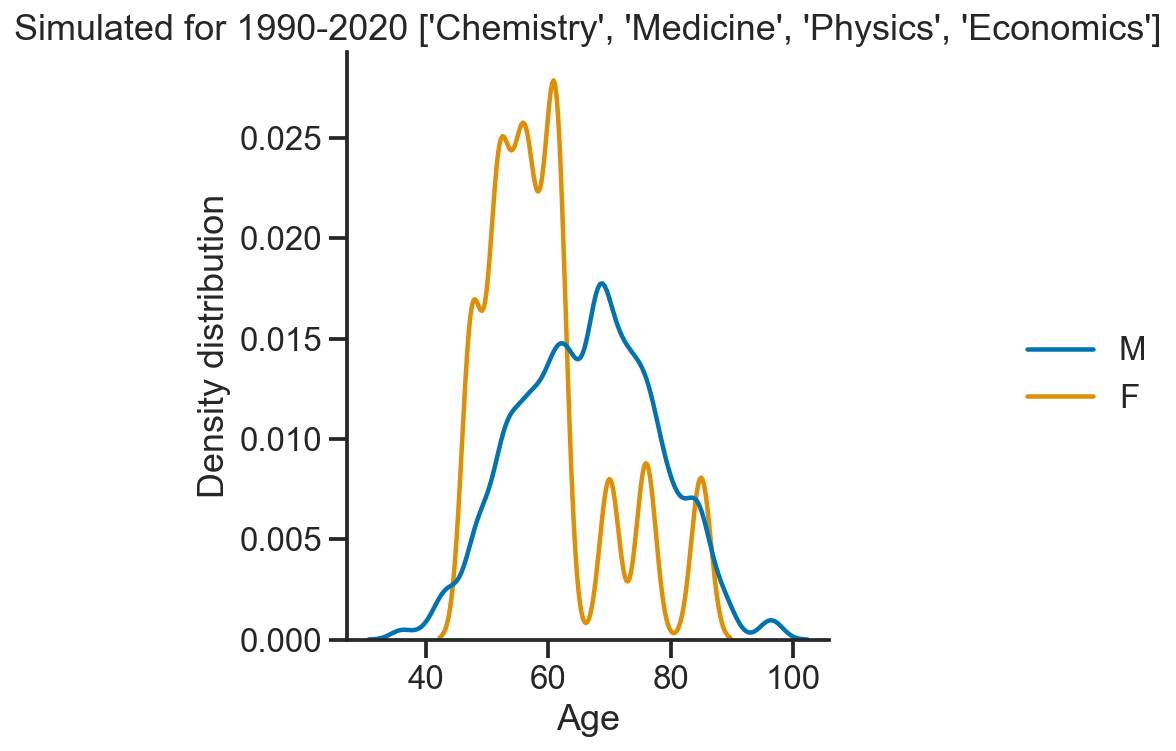

In [28]:
cat_stem = [['Peace'], ['Literature'], ['Literature', 'Peace'], 
            ['Chemistry', 'Medicine', 'Physics', 'Economics']]
for cat_stem in cat_stem:
    
    female_by_yrs = df[(df['gender'] == 'Female') & (df['category'].isin(cat_stem)) & (df['year'] > change_year.min())]
    male_by_yrs = df[(df['gender'] == 'Male') & (df['category'].isin(cat_stem)) & (df['year'] > change_year.min())]


    # Randomly draw 1 female and 1 male from their parent distributions, compute the odds of age_f < age_m
    age_female_array = female_by_yrs['age'].iloc[:].values
    age_male_array = male_by_yrs['age'].iloc[:].values
    len_f = len(age_female_array)
    len_m = len(age_male_array)

    fu = 10**4   # number of parallel universes where you do the experiment 
    unis = range(100, 100+fu)      # random numbers to seed those universes
    count_f = 0
    count_t = 0
    f_age_arr = []
    m_age_arr = []

    for i in unis:
        np.random.seed(i) # a random universe
        rand1 = np.random.randint(0, len_f) # a random index for the f group
        f_age = age_female_array[rand1]
        rand2 = np.random.randint(0, len_m) # a random index for the f group
        m_age = age_male_array[rand2]
        f_age_arr.append(f_age)
        m_age_arr.append(m_age)
        if f_age < m_age:
            count_f = count_f + 1 
        count_t = count_t + 1   


    odds  = np.round((count_f/count_t)/(1 - (count_f/count_t)), 1)  
    print(f'The odds of a randomly select woman in {cat_stem}\n\
        being younger than a randomly select man are {odds} in 1')   

    newdf = pd.DataFrame(data=np.column_stack((m_age_arr, f_age_arr)),columns=['M','F'])
    ax1 = sns.displot(newdf, kind = 'kde')
    ax1.set(xlabel = 'Age', ylabel = 'Density distribution', title = f'Simulated for 1990-2020 {cat_stem}') 
plt.savefig('Simulated_stem.png')
plt.show()

We have already concluded that the age difference between female and fmale is not significant if we include all data. We can do a similar random selection using the full data and see the odds of a female being younger. It should not be much larger than 1.

In [32]:
# Randomly draw 1 female and 1 male from their parent distributions, compute the odds of age_f < age_m
age_female_array = df[df['gender'] == 'Female']['age'].values
age_male_array = df[df['gender'] == 'Male']['age'].values
len_f = len(age_female_array)
len_m = len(age_male_array)

fu = 300  # number of parallel universes where you do the experiment 
unis = range(10, 10+fu)      # random numbers to seed those universes
count_f = 0
count_t = 0
f_age_arr = []
m_age_arr = []

for i in unis:
    np.random.seed(i) # a random universe
    rand1 = np.random.randint(0, len_f) # a random index for the f group
    f_age = age_female_array[rand1]
    rand2 = np.random.randint(0, len_m) # a random index for the f group
    m_age = age_male_array[rand2]
    f_age_arr.append(f_age)
    m_age_arr.append(m_age)
    if f_age < m_age:
        count_f = count_f + 1 
    count_t = count_t + 1       
odds  = np.round((count_f/count_t)/(1 - (count_f/count_t)), 1)  
print(f'For all, the odds of a randomly select woman being younger than a randomly select man are {odds} in 1')   

For all, the odds of a randomly select woman being younger than a randomly select man are 1.1 in 1


<!-- 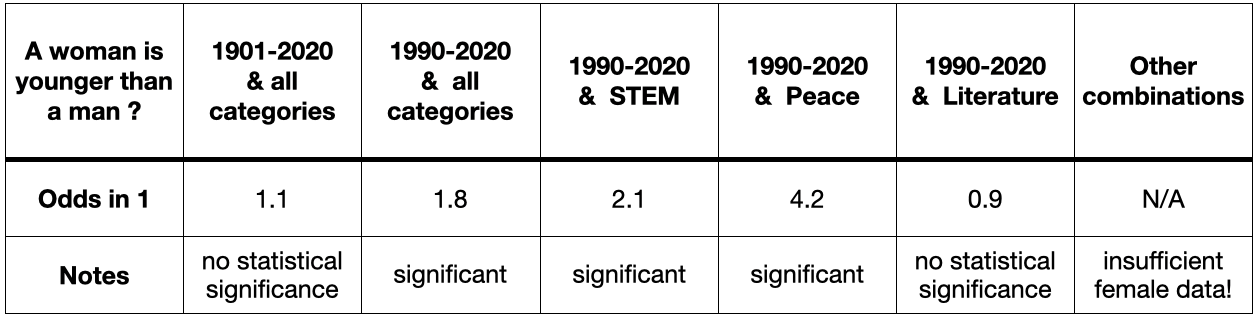 -->

Here is the answer we want:
<div>
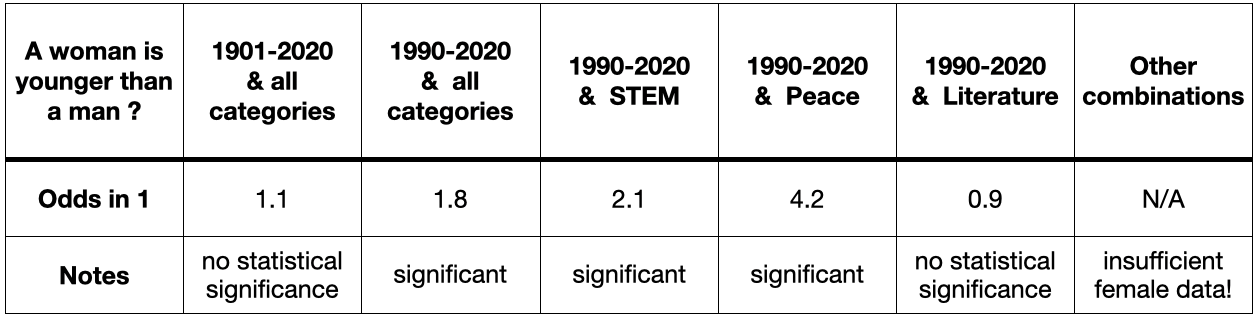
</div>